In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


In [58]:
DiseasesDf = pd.read_csv("heart_disease_uci_modified.csv")

## Data Exploration

In [59]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
DiseasesDf.head()

First 5 rows of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2.0
2,3.0,67.0,mALE,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0.0


In [60]:
# Display the last few rows of the dataset
print("\nLast 5 rows of the dataset:")
DiseasesDf.tail()


Last 5 rows of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,nan-,139.0,False,st-t abnormality,NaN,NaN,NaN,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0.0
919,920.0,62.0,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,1.0


In [61]:
# Display the basic information about the dataset (column names, non-null counts, data types)
print("\nBasic information about the dataset:")
DiseasesDf.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        820 non-null    float64
 1   age       820 non-null    float64
 2   sex       820 non-null    object 
 3   dataset   820 non-null    object 
 4   cp        820 non-null    object 
 5   trestbps  787 non-null    object 
 6   chol      796 non-null    float64
 7   fbs       743 non-null    object 
 8   restecg   819 non-null    object 
 9   thalch    769 non-null    float64
 10  exang     769 non-null    object 
 11  oldpeak   762 non-null    float64
 12  num       820 non-null    float64
dtypes: float64(6), object(7)
memory usage: 93.6+ KB


In [62]:
# Display basic statistics (mean, standard deviation, min, max, etc.)
print("\nSummary statistics of numerical columns:")
describe=pd.DataFrame(DiseasesDf.describe())
describe


Summary statistics of numerical columns:


,id,age,chol,thalch,oldpeak,num
count,820.000000,820.000000,796.000000,769.000000,762.000000,820.000000
mean,466.103659,74.836585,199.536432,137.465540,0.880052,0.997561
std,265.182846,62.284158,110.870495,26.424601,1.089815,1.139798
min,1.000000,28.000000,0.000000,63.000000,-2.600000,0.000000
25%,237.750000,48.000000,175.000000,119.000000,0.000000,0.000000
50%,471.500000,56.000000,224.000000,140.000000,0.500000,1.000000
75%,698.250000,63.000000,268.250000,158.000000,1.500000,2.000000
max,920.000000,297.000000,603.000000,202.000000,6.200000,4.000000


In [63]:
# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()


Missing values in each column:


id          100
age         100
sex         100
dataset     100
cp          100
trestbps    133
chol        124
fbs         177
restecg     101
thalch      151
exang       151
oldpeak     158
num         100
dtype: int64

In [64]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
DiseasesDf.shape


Shape of the dataset (rows, columns):


(920, 13)

In [65]:
# Display the data types of each column
print("\nData types of each column:")
DiseasesDf.dtypes


Data types of each column:


id          float64
age         float64
sex          object
dataset      object
cp           object
trestbps     object
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
num         float64
dtype: object

## Data Cleaning

In [66]:
# dropping duplicates
duplicates=DiseasesDf[DiseasesDf.duplicated()]
DiseasesDf.drop(duplicates.index, inplace=True)

#####  "id" column

In [67]:
duplicates_id=DiseasesDf[DiseasesDf.duplicated(["id"])]
print("Number of duplicated ID: ",len(duplicates_id))
DiseasesDf.drop(duplicates_id.index, inplace=True)


Number of duplicated ID:  3


In [68]:
# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()


Missing values in each column:


id           1
age          1
sex          1
dataset      1
cp           1
trestbps    48
chol        25
fbs         78
restecg      2
thalch      52
exang       52
oldpeak     59
num          1
dtype: int64

In [69]:
DiseasesDf.dropna(subset=["id"], inplace=True)

# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()


Missing values in each column:


id           0
age          0
sex          0
dataset      0
cp           0
trestbps    47
chol        24
fbs         77
restecg      1
thalch      51
exang       51
oldpeak     58
num          0
dtype: int64

#### "sex" column :

In [70]:
print("\nsex column unique values:")
DiseasesDf["sex"].unique()


sex column unique values:


array(['Male', 'mALE', 'Female', 'FeMALE'], dtype=object)

In [71]:
repl_dict = {"male": 0, "female": 1}
DiseasesDf["sex"] = DiseasesDf["sex"].str.strip().str.lower().replace(repl_dict)
DiseasesDf["sex"].value_counts()


/var/folders/j0/slzgff05495c7m5nvwd2_tn40000gn/T/ipykernel_3029/795111229.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DiseasesDf["sex"] = DiseasesDf["sex"].str.strip().str.lower().replace(repl_dict)


sex
0    654
1    166
Name: count, dtype: int64

#### "dataset" column :

In [72]:
print("\nsex column unique values:")
DiseasesDf["dataset"].unique()


sex column unique values:


array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [73]:
# encoding
DiseasesDf["dateset_code"]=DiseasesDf["dataset"].astype("category").cat.codes
categories = DiseasesDf["dataset"]
print("\ndateset code:")
name_map = dict(zip(DiseasesDf["dateset_code"], categories))
print(name_map)


dateset code:
{0: 'Cleveland', 1: 'Hungary', 2: 'Switzerland', 3: 'VA Long Beach'}


#### "cp" column :

In [74]:
print("\cp column unique values:", DiseasesDf["cp"].unique())
DiseasesDf["cp_code"]=DiseasesDf["cp"].astype("category").cat.codes
categories = DiseasesDf["cp"]
name_map = dict(zip(DiseasesDf["dateset_code"], categories))
print("\ndateset code: ",name_map)

\cp column unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

dateset code:  {0: 'atypical angina', 1: 'asymptomatic', 2: 'atypical angina', 3: 'atypical angina'}


#### 	"trestbps" column :

In [75]:
print("\nsex column unique values:")
DiseasesDf["trestbps"].unique()	


sex column unique values:


array(['145.0', '160.0', '120.0', '130.0', '140.0', '140.0/', '150.0',
       '110.0-', '150.0*', '132.0', '150.0-', '110.0', '117.0', '135.0',
       '130.0/', '112.0', '105.0', '120.0*', '124.0/', '125.0', '142.0',
       '128.0', '120.0/', '170.0', '155.0', '125.0-', '104.0', '138.0',
       '160.0/', '108.0', '134.0', '122.0-', '115.0', '118.0', '140.0*',
       '128.0/', '138.0-', '135.0/', '100.0', '200.0', '124.0-', '94.0',
       '122.0', '102.0*', '152.0', '125.0/', '101.0', '124.0', '126.0',
       '142.0-', '174.0', '148.0/', '178.0', '158.0-', '192.0', '129.0*',
       '138.0*', '180.0', '128.0*', '144.0', '120.0-', '112.0*', '123.0',
       '118.0-', '136.0', '130.0*', '110.0/', '146.0', '106.0', '156.0',
       '146.0*', '154.0', '148.0', '114.0', '130.0-', '132.0*', '164.0',
       '98.0', '190.0', '110.0*', '115.0/', nan, '113.0', '180.0/',
       '140.0-', '92.0', '118.0*', '160.0*', '136.0/', '135.0*', '160.0-',
       '95.0', '145.0-', '100.0*', '155.0*', '105.0-', '

In [76]:
DiseasesDf["trestbps"] = DiseasesDf["trestbps"].replace(r"[*\/-]", "", regex=True)
DiseasesDf["trestbps"]= pd.to_numeric(DiseasesDf["trestbps"], errors='coerce')


In [77]:
#dropping missing values
DiseasesDf.dropna(subset=["trestbps"], inplace=True)

In [78]:
# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()


Missing values in each column:


id               0
age              0
sex              0
dataset          0
cp               0
trestbps         0
chol            21
fbs             76
restecg          1
thalch           0
exang            0
oldpeak          7
num              0
dateset_code     0
cp_code          0
dtype: int64

#### "exang" column :

In [79]:
print("\exang column unique values: ", DiseasesDf["exang"].unique()	)

\exang column unique values:  [False True]


In [80]:
# encoding
DiseasesDf["exang_code"]=DiseasesDf["exang"].replace({"False":"0", "True":"1"}).astype(int)

/var/folders/j0/slzgff05495c7m5nvwd2_tn40000gn/T/ipykernel_3029/842509188.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DiseasesDf["exang_code"]=DiseasesDf["exang"].replace({"False":"0", "True":"1"}).astype(int)


In [81]:
# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()


Missing values in each column:


id               0
age              0
sex              0
dataset          0
cp               0
trestbps         0
chol            21
fbs             76
restecg          1
thalch           0
exang            0
oldpeak          7
num              0
dateset_code     0
cp_code          0
exang_code       0
dtype: int64

### "fbs" column :

In [82]:
print("\nfbs column unique values: ",DiseasesDf["fbs"].unique())


fbs column unique values:  [True False nan]


In [83]:
DiseasesDf["fbs_code"]= pd.to_numeric(DiseasesDf["fbs"], errors='coerce')
print("\nfbs column unique values: ",DiseasesDf["fbs_code"].unique())


fbs column unique values:  [ 1.  0. nan]


#### 	rest of columns :

In [84]:
#dropping missing values
DiseasesDf.dropna(subset=["chol", "oldpeak", "restecg","fbs"], inplace=True)

In [85]:
# Check for missing values
print("\nMissing values in each column:")
DiseasesDf.isnull().sum()



Missing values in each column:


id              0
age             0
sex             0
dataset         0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
num             0
dateset_code    0
cp_code         0
exang_code      0
fbs_code        0
dtype: int64

In [86]:
DiseasesDf.shape

(664, 17)

In [87]:
print("\restecg column unique values: ", DiseasesDf["restecg"].unique())
	
DiseasesDf["restecg_code"]=DiseasesDf["restecg"].astype("category").cat.codes
categories = DiseasesDf["restecg"]
name_map = dict(zip(DiseasesDf["restecg_code"],categories))
print("\ndateset code: ",name_map)



estecg column unique values:  ['lv hypertrophy' 'normal' 'st-t abnormality']

dateset code:  {0: 'lv hypertrophy', 1: 'normal', 2: 'st-t abnormality'}


## visualisation

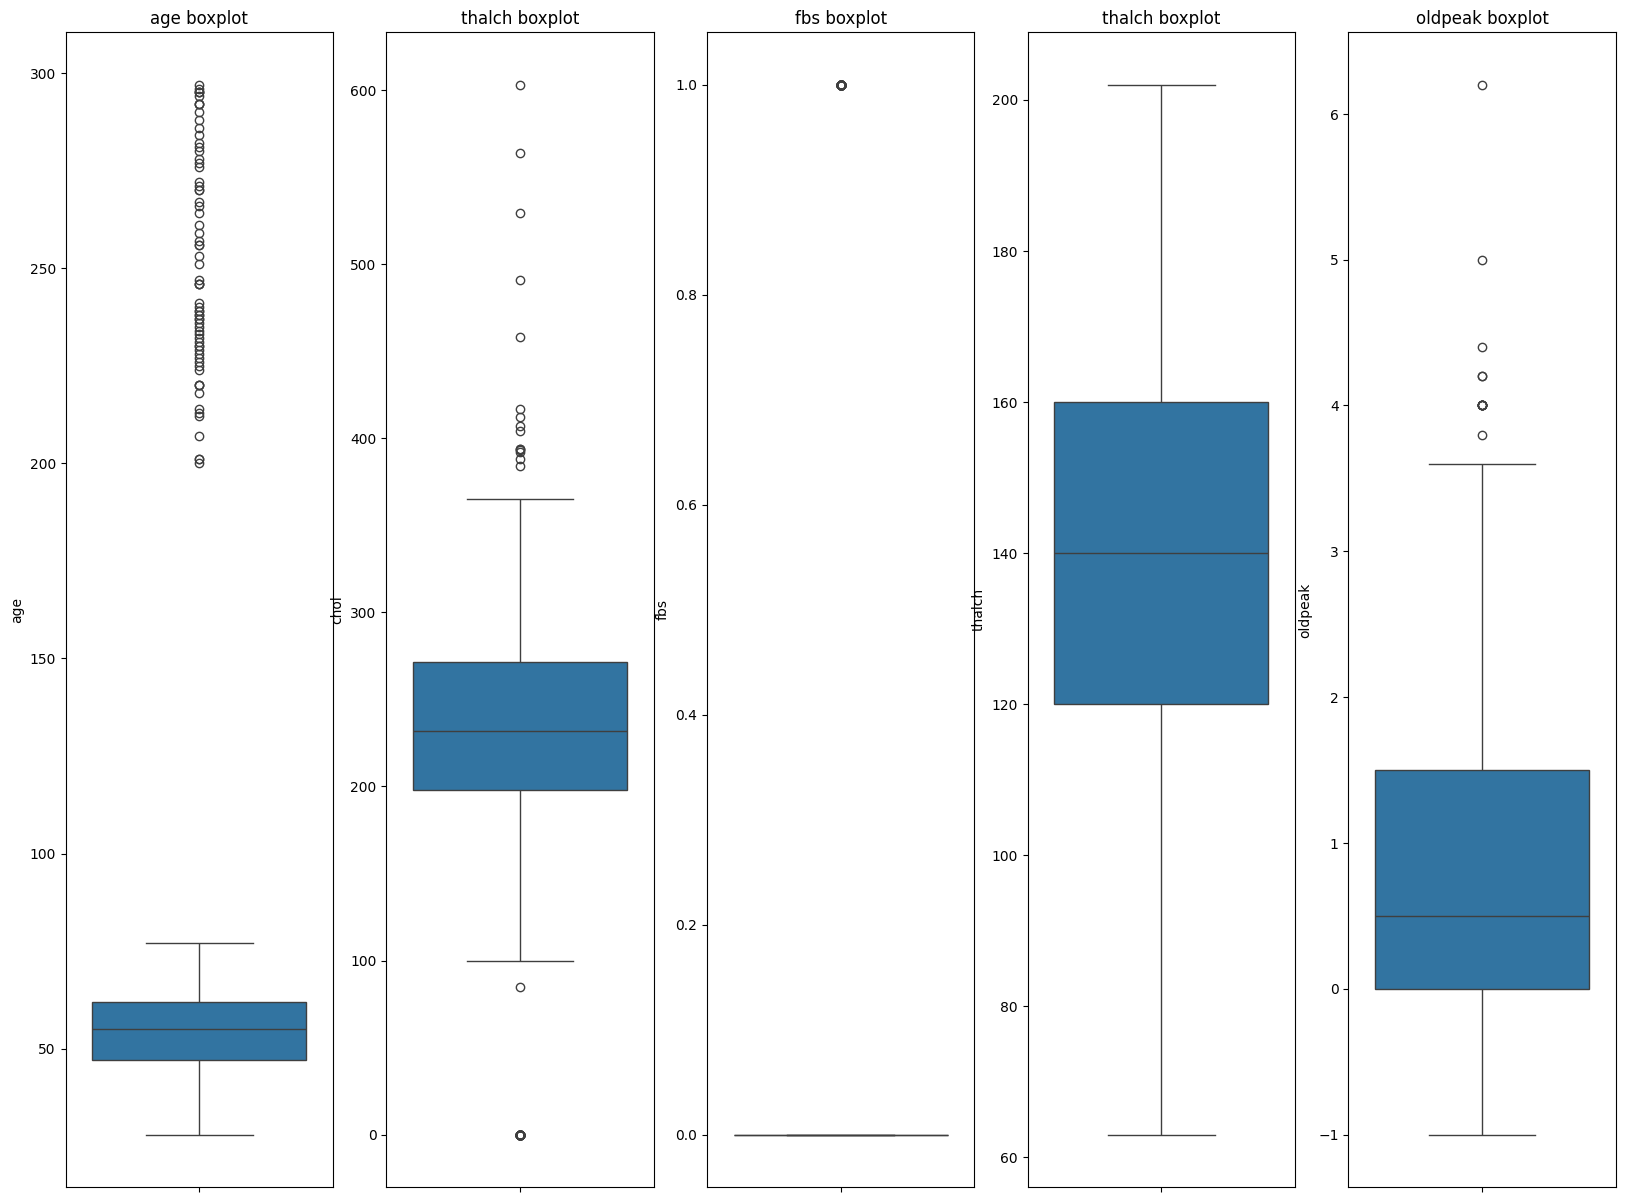

In [88]:
#boxplots 
plt.figure(figsize=(20, 15))

#Subplot 1:
plt.subplot(1, 5, 1)
sns.boxplot(y='age' , data=DiseasesDf)
plt.title('age boxplot')

# Subplot 2: 
plt.subplot(1, 5, 2)
sns.boxplot(y='chol' , data=DiseasesDf)
plt.title('thalch boxplot')

# Subplot 3: 
plt.subplot(1, 5, 3)
sns.boxplot(y='fbs' , data=DiseasesDf)
plt.title('fbs boxplot')

# Subplot 4:
plt.subplot(1, 5, 4) 
sns.boxplot(y='thalch' , data=DiseasesDf)
plt.title('thalch boxplot')

# Subplot 5:
plt.subplot(1, 5, 5) 
sns.boxplot(y='oldpeak' , data=DiseasesDf)
plt.title('oldpeak boxplot')

plt.show()

In [89]:
DiseasesDf=DiseasesDf[DiseasesDf["age"]<130]
DiseasesDf=DiseasesDf[DiseasesDf["thalch"]<450]
DiseasesDf=DiseasesDf[DiseasesDf["oldpeak"]<4.8]

In [90]:
DiseasesDf.shape

(592, 18)

In [91]:
numerical_features=pd.DataFrame(DiseasesDf.describe())


Correlation matrix:


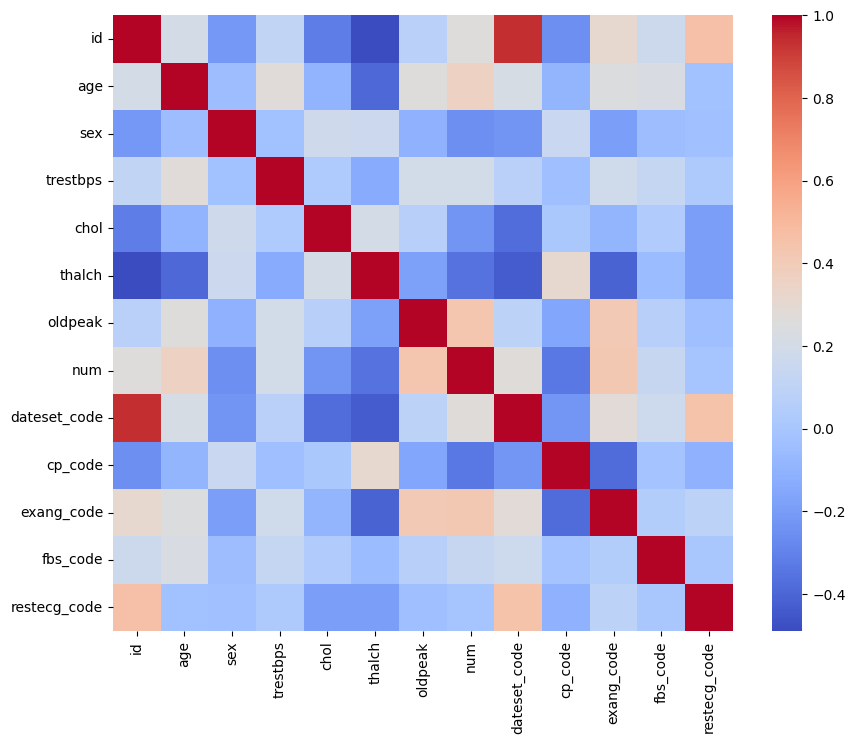

In [92]:
# Display the correlation matrix (for numerical data)
print("\nCorrelation matrix:")
numerical_df = DiseasesDf[numerical_features.columns]
correlation_matrix=numerical_df.corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

# splitting the data


In [93]:
# Scaling variables
scaler = StandardScaler() 
scaled_DiseasesDf = pd.DataFrame(scaler.fit_transform(numerical_df),columns=numerical_df.columns)
scaled_DiseasesDf.head()

,id,age,sex,trestbps,chol,thalch,oldpeak,num,dateset_code,cp_code,exang_code,fbs_code,restecg_code
0,-1.597243,1.064425,-0.538294,0.681504,0.152801,0.431946,1.373570,-0.828167,-0.955262,2.305895,-0.825723,2.425638,-1.469160
1,-1.593380,1.490267,-0.538294,1.523664,0.710666,-1.146756,0.605448,0.954650,-0.955262,-0.820265,1.211060,-0.412263,-1.469160
2,-1.589518,1.490267,-0.538294,-0.722095,0.110698,-0.357405,1.661616,0.063242,-0.955262,-0.820265,1.211060,-0.412263,-1.469160
3,-1.585655,-1.703547,-0.538294,-0.160655,0.331739,1.822707,2.525753,-0.828167,-0.955262,1.263842,-0.825723,-0.412263,0.115071
4,-1.581792,-1.277705,1.857721,-0.160655,-0.152446,1.258885,0.509432,-0.828167,-0.955262,0.221788,-0.825723,-0.412263,-1.469160


In [94]:
X=scaled_DiseasesDf.drop(["id","cp_code"],axis=1)
y=DiseasesDf[["cp"]]
print(X.shape)


(592, 11)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
models_result={}

In [97]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return accuracy

### Model1: RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=1)

In [99]:
importances = rf.feature_importances_
print("features importances: ", importances)
importance_threshold = 0.1 
important_features = X.columns[importances >= importance_threshold]
print("\nSelected features after thresholding:", list(important_features))

features importances:  [0.09442693 0.02548483 0.0823509  0.0859125  0.17545436 0.10571888
 0.22744894 0.055055   0.11958243 0.00905683 0.01950839]

Selected features after thresholding: ['thalch', 'oldpeak', 'num', 'exang_code']


In [100]:
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]


In [101]:
res=evaluate_model(rf, X_train_imp, X_test_imp, y_train, y_test)
models_result["RandomForestClassifier"] = res
print("RandomForestClassifier accuracy: ", res)

RandomForestClassifier accuracy:  0.5842696629213483


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


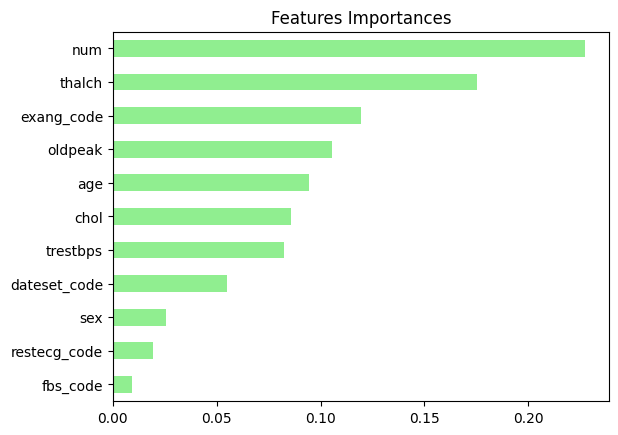

In [102]:
# features importances visualisation 
importances = pd.Series(data=importances, index= X_train.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

### Model2: Logistic Regression

In [103]:
lr = LogisticRegression()
cv_scores = cross_val_score(lr, X, y, cv=13, scoring='accuracy')  # Change 'scoring' for other metrics


"""print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))""" # same result : Mean Accuracy: 0.5882199925678187

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d

In [104]:
y_pred = lr.predict(X_test)
models_result["LogisticRegression"]=lr.score(X_test, y_test)
print("LogisticRegression accuracy", lr.score(X_test, y_test))

LogisticRegression accuracy 0.5842696629213483


### Model3: KNeighborsClassifier

In [105]:
neighbors = np.arange(1, 13)
test_accuracies =[]
for neighbor in neighbors :
	knn= KNeighborsClassifier(n_neighbors=neighbor)
	res=evaluate_model(knn, X_train_imp, X_test_imp, y_train, y_test)
	test_accuracies.append(res)
 
print(neighbors,"\n",test_accuracies)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 [0.4887640449438202, 0.5168539325842697, 0.5730337078651685, 0.601123595505618, 0.5674157303370787, 0.5617977528089888, 0.5730337078651685, 0.5842696629213483, 0.5561797752808989, 0.5561797752808989, 0.5674157303370787, 0.550561797752809]


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [106]:
models_result["KNeighborsClassifier"]=max(test_accuracies)
print("KNeighborsClassifier accuracy: ", max(test_accuracies))

KNeighborsClassifier accuracy:  0.601123595505618


### Model 3: DecisionTreeClassifier


In [107]:
params_dt = {'max_depth':[2,3,4],'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}
dt=DecisionTreeClassifier(max_depth=6, random_state=1)
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_model = grid_dt.best_estimator_

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


In [108]:
res=evaluate_model(best_model, X_train_imp, X_test_imp, y_train, y_test)
models_result["DecisionTreeRegressor"]=res
print("DecisionTreeRegressor accuracy: ", res)

DecisionTreeRegressor accuracy:  0.5955056179775281


### Model 5: voting Classifier

In [109]:

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', best_model),('RandomForestClassifier',rf)]
vc = VotingClassifier(estimators=classifiers)     
vc.fit(X_train, y_train)   



/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(n_neighbors=np.int64(12))),
                             ('Classification Tree',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_leaf=0.12,
                                                     random_state=1)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=1))])

In [110]:
res=evaluate_model(vc, X_train_imp, X_test_imp, y_train, y_test)
models_result["VotingClassifier"] = res
print("VotingClassifier accuracy: ", res)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier accuracy:  0.6123595505617978


In [111]:
print("\nmodels result:")
models_result



models result:


{'RandomForestClassifier': 0.5842696629213483,
 'LogisticRegression': 0.5842696629213483,
 'KNeighborsClassifier': 0.601123595505618,
 'DecisionTreeRegressor': 0.5955056179775281,
 'VotingClassifier': 0.6123595505617978}

In [112]:
print("VotingClassifier is the most performant with score= 0.6123595505617978")

VotingClassifier is the most performant with score= 0.6123595505617978
